 ###  Figure 4 from the paper arXiv:2106.10203 
 
Scatter plot of RMAE and RWIS on one week ahead forecast for the selected subset of 80 countries, with points in red corresponding to the 30 countries with either larger populations or larger population density  included in the bar plot on the right

In [3]:
%load_ext autoreload
%autoreload 2
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob 
import warnings
import time
import seaborn as sns
warnings.filterwarnings("ignore")
import sys
sys.path.append('../source/')
sys.path.append('../methods_configuration/')
from precomputing import read_countries  
import numpy as np
import time   
import pandas as pd
from scipy import stats 
from paper_evaluation import evaluation
import matplotlib.colors as colors
import adjustText
from adjustText import adjust_text
 
   
path_data = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/b849410bace2cc777227f0f1ac747a74fd8dc4be/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
datasource, parse_column = "JHU", "Country/Region"
 
df = pd.read_csv(path_data)  
countries = list(set(df[parse_column])-set(["Cases_on_an_international_conveyance_Japan", 
                                            "Diamond_Princess", "Diamond Princess"]))   
from countries_preselected import countries_preselected 
subset = [3] 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
pop_file = '../data/population.csv'
population = pd.read_csv(pop_file)  

In [5]:
population

,#,country,population,Yearly,Net,Density,Land Area,Migrants,Fert.,Med.,Urban,World
0,1,China,"1,439,323,776",0.39%,"5,540,090",153,"9,388,211","-348,399",1.7,38,61%,18.47%
1,2,India,"1,380,004,385",0.99%,"13,586,631",464,"2,973,190","-532,687",2.2,28,35%,17.70%
2,3,US,"331,002,651",0.59%,"1,937,734",36,"9,147,420","954,806",1.8,38,83%,4.25%
3,4,Indonesia,"273,523,615",1.07%,"2,898,047",151,"1,811,570","-98,955",2.3,30,56%,3.51%
4,5,Pakistan,"220,892,340",2.00%,"4,327,022",287,"770,880","-233,379",3.6,23,35%,2.83%
...,...,...,...,...,...,...,...,...,...,...,...,...
230,231,Montserrat,"4,992",0.06%,3,50,100,NaN,N.A.,N.A.,10%,0.00%
231,232,Falkland Islands,"3,480",3.05%,103,0,"12,170",NaN,N.A.,N.A.,66%,0.00%
232,233,Niue,"1,626",0.68%,11,6,260,NaN,N.A.,N.A.,46%,0.00%
233,234,Tokelau,"1,357",1.27%,17,136,10,NaN,N.A.,N.A.,0%,0.00%


In [8]:
population["country"][population["country"]=="DR Congo"] = "Congo (Kinshasa)"
population["country"][population["country"]=="Bahrain"] ="Kosovo" 
population = population.reset_index(drop=True)
selected = population[(population["country"].isin(countries_preselected))&\
           ((population["population"].str.replace(',', '', regex=False).astype(int)>44000000)|\
           ((population["population"].str.replace(',', '', regex=False).astype(int)>6500000)&\
           (population["Density"].str.replace(',', '', regex=False).astype(int)>200)))].reset_index()

In [9]:
selected

,index,#,country,population,Yearly,Net,Density,Land Area,Migrants,Fert.,Med.,Urban,World
0,0,1,China,"1,439,323,776",0.39%,"5,540,090",153,"9,388,211","-348,399",1.7,38,61%,18.47%
1,1,2,India,"1,380,004,385",0.99%,"13,586,631",464,"2,973,190","-532,687",2.2,28,35%,17.70%
2,2,3,US,"331,002,651",0.59%,"1,937,734",36,"9,147,420","954,806",1.8,38,83%,4.25%
3,3,4,Indonesia,"273,523,615",1.07%,"2,898,047",151,"1,811,570","-98,955",2.3,30,56%,3.51%
4,4,5,Pakistan,"220,892,340",2.00%,"4,327,022",287,"770,880","-233,379",3.6,23,35%,2.83%
5,6,7,Nigeria,"206,139,589",2.58%,"5,175,990",226,"910,770","-60,000",5.4,18,52%,2.64%
6,7,8,Bangladesh,"164,689,383",1.01%,"1,643,222","1,265","130,170","-369,501",2.1,28,39%,2.11%
7,8,9,Russia,"145,934,462",0.04%,"62,206",9,"16,376,870","182,456",1.8,40,74%,1.87%
8,9,10,Mexico,"128,932,753",1.06%,"1,357,224",66,"1,943,950","-60,000",2.1,29,84%,1.65%
9,10,11,Japan,"126,476,461",-0.30%,"-383,840",347,"364,555","71,560",1.4,48,92%,1.62%


In [10]:
population[population["country"]=="Congo (Kinshasa)"]

,#,country,population,Yearly,Net,Density,Land Area,Migrants,Fert.,Med.,Urban,World
15,16,Congo (Kinshasa),"89,561,403",3.19%,"2,770,836",40,"2,267,050","23,861",6,17,46%,1.15%


In [11]:
selected.shape

(30, 13)

In [12]:
population.index = population.country

In [13]:
pop_df =  population[["population"]]
pop_df["population"] = pop_df["population"].str.replace(',', '', regex=False).astype(int)/100000
pop_df

,population
country,
China,14393.23776
India,13800.04385
US,3310.02651
Indonesia,2735.23615
Pakistan,2208.92340
...,...
Montserrat,0.04992
Falkland Islands,0.03480
Niue,0.01626


In [14]:
countries_selected_ = list(selected["country"]) 
len(countries_selected_)

30

In [15]:
df_all = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")

In [16]:
RI_, WIS, coverage = evaluation(countries_preselected, date_limits=['2020-04-01','2021-12-01'])

In [17]:
coverage["$RI_0$"] = (coverage["forecast"]-coverage["baseline"])/(coverage["baseline"])
WIS["$RI_{WIS}$"] = (WIS["baseline_WIS"]-WIS["forecast_WIS"])/(WIS["baseline_WIS"]+1)
RI = RI_.merge(WIS, on=["country"], how="inner").merge(coverage, on=["country"], how="inner")
colname = "$RI_0$" 
colors = {}
alphas = np.linspace(0.1, 1, 10)
rgba_colors = np.zeros((10,4))
# for red the first column needs to be one
rgba_colors[0,:] = [0.5,0.5,0.5,1]
rgba_colors[1,:] = [0,0.5,0.8,1]
# the fourth column needs to be your alphas 

colors[1]=rgba_colors[0,:]
colors[0]=rgba_colors[1,:]
        
rate = len(np.where(RI[colname]>0.5)[0])/len(RI[colname]) 
RI.index = RI["country"]
RI = RI.sort_values(by=colname) 

In [18]:
s = sns.mpl_palette("GnBu_d") 
c_show = (0.23442778418556967, 0.45820838139177245, 0.5435294117647058),
c_rest = (0.5800230680507498, 0.8189004229142637, 0.7502806612841215)
c_axis = (0.32480840702293995, 0.6849314366269383, 0.7899474561066256)

idx = np.where(RI["country"].isin(countries_selected_)) 
df = RI[['$RI_{MAE}$','$RI_{WIS}$',"country"]].rename(columns={'$RI_{MAE}$':"RMAE",'$RI_{WIS}$':"RWIS"})
df = df[df["country"].isin(countries_selected_)].sort_values(by="RMAE") 

df["country"].replace({"Congo (Kinshasa)":"DRC"},inplace=True)
df["country"].replace({"United Kingdom":"UK"},inplace=True)
df["country"].replace({"Dominican Republic":"Dom Rep"},inplace=True)

df.index = df.country 
df = df.rename(columns={"country":'class'}) 
#plt.rcParams['figure.dpi'] = 300
df = pd.melt(df, id_vars="class", var_name="Improvement", value_name="value") 

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


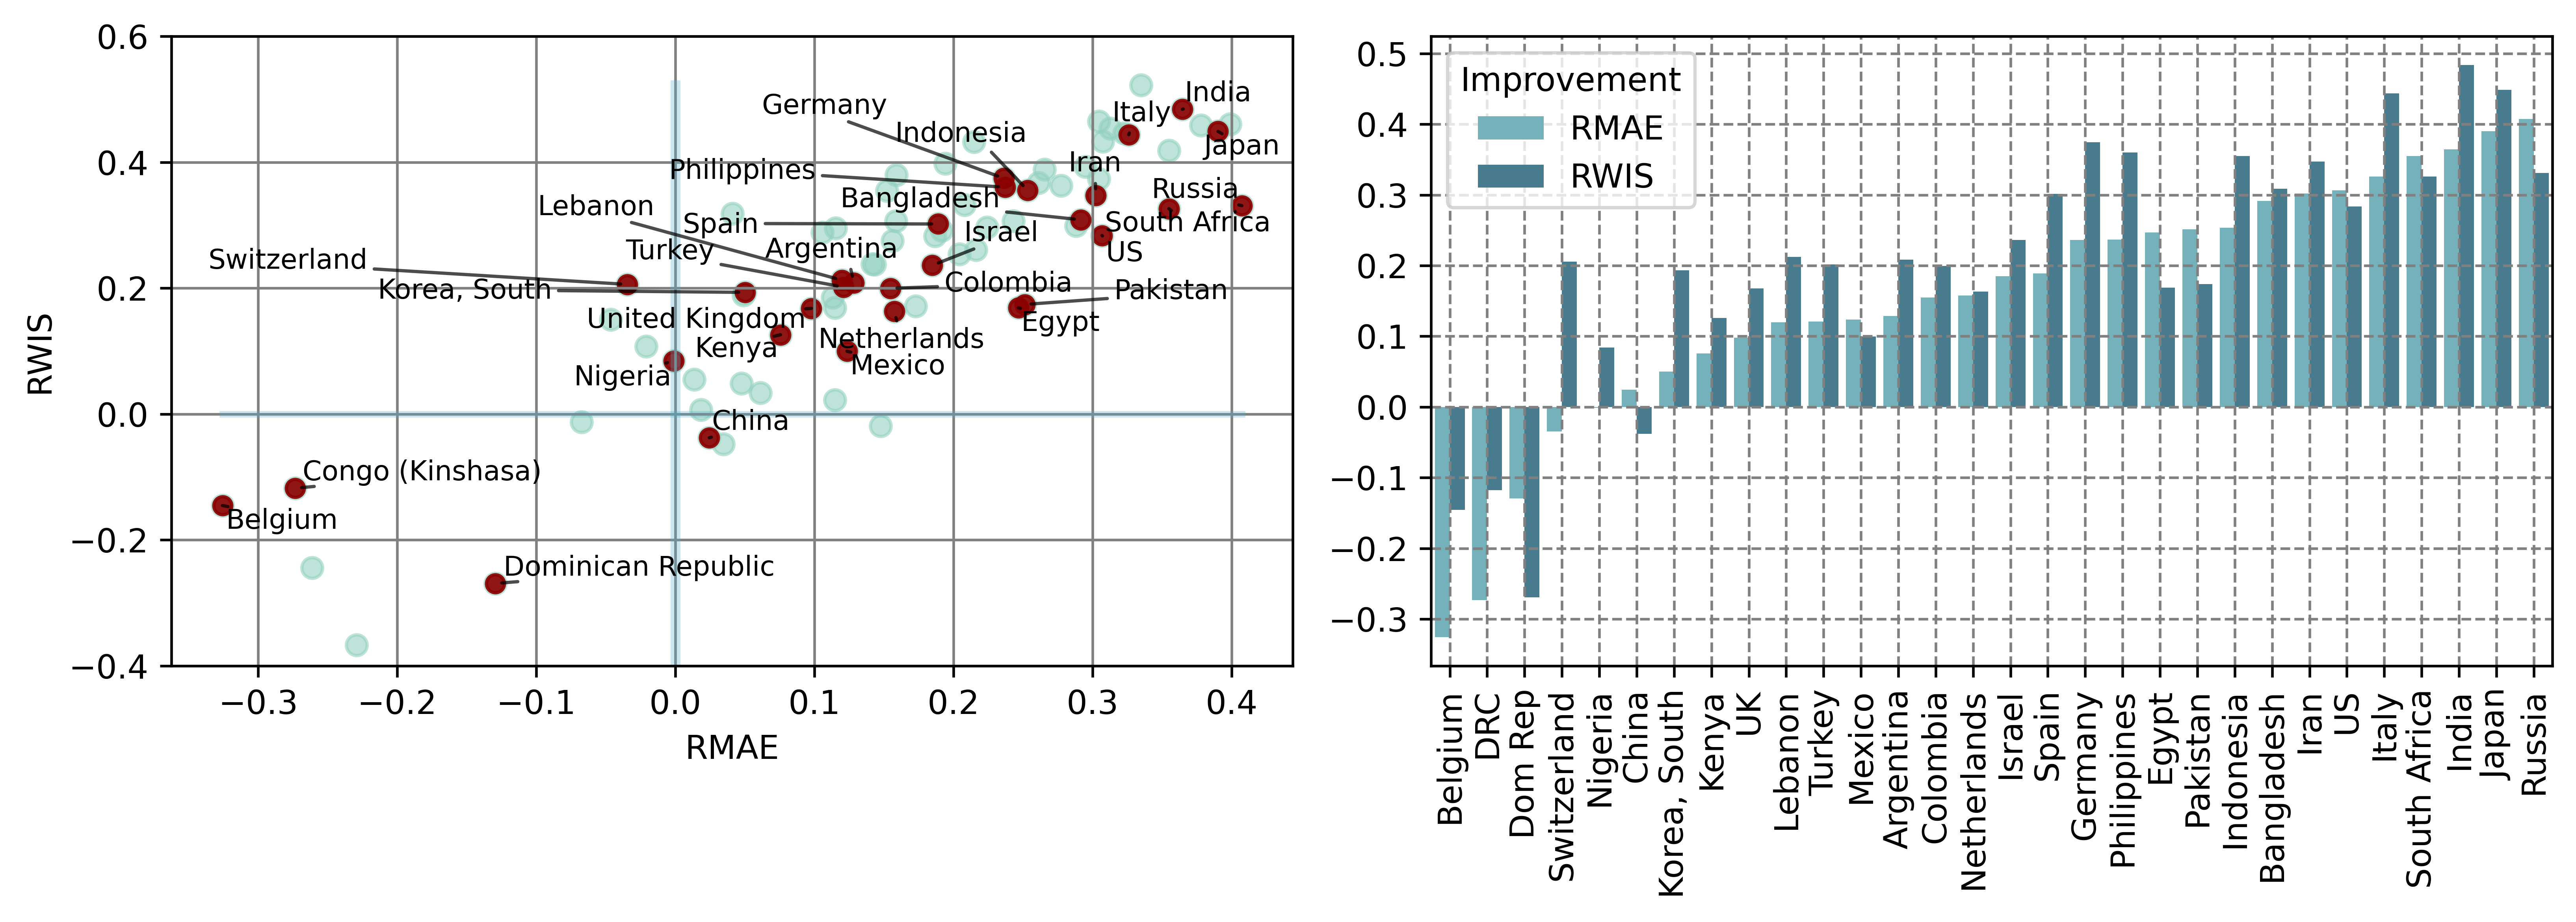

In [19]:
c_show = "darkred"

plt.rcParams['figure.dpi'] = 300

fig,ax = plt.subplots(1,2,figsize=(11,4),dpi=600)
ax[0].grid(True,which="both",ls="-",c='gray') 

ax[0].set_ylim([-0.4,0.6])
ax[0].scatter(RI["$RI_{MAE}$"].values, RI['$RI_{WIS}$'].values, alpha=0.6, c=c_rest, s= 40)#s=np.sqrt(RI["population"].values[i]))

for i in idx:
    z = RI["$RI_{MAE}$"].values[i]
    y = RI['$RI_{WIS}$'].values[i]
    ax[0].scatter(z, y, alpha=0.9, c=c_show, s= 30)#s=np.sqrt(RI["population"].values[i]))

ts = []      
z = RI["$RI_{MAE}$"].values[idx]
y = RI['$RI_{WIS}$'].values[idx]
text = RI["country"].values[idx] 

ts  = [ax[0].text(z[i], y[i], text[i], fontsize ="small") for i in range(len(text))]#,fontweight="demibold"


ax[0].set_ylabel("RWIS")
ax[0].plot([np.min(RI["$RI_{MAE}$"]),np.max(RI["$RI_{MAE}$"])],[0,0],c=c_axis,lw=2,ls="-",alpha=0.3)
ax[0].plot([0,0],[np.min(RI['$RI_{WIS}$']),np.max(RI['$RI_{WIS}$'])],c=c_axis,lw=3,ls="-",alpha=0.3)
ax[0].set_xlabel("RMAE") 

adjust_text(ts,ax=ax[0], x=z, y=y, arrowprops=dict(arrowstyle='-', color='black',alpha=0.7))    
 
sns.barplot(ax=ax[1],x='class', y="value", hue="Improvement", palette="GnBu_d",data=df ) 
ax[1].set_xticklabels(rotation=90,labels=df["class"])
ax[1].grid(True,which="both",ls="--",c='gray')
ax[1].set(xlabel=None, ylabel=None)

fig.tight_layout()
 
fig.savefig('ri3.pdf')